In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve, leastsq, minimize_scalar, curve_fit, minimize
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.io import loadmat
from IPython.display import display, Math
import matplotlib as mpl
import matplotlib
plt.rcParams.update({'font.size': 18})


from IPython.core.display import display, HTML
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

C:\Users\Quentin\AppData\Local\Temp\ipykernel_10308\1568696821.py:14: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


### Loading

In [4]:
# Gerardo's simulations are given in terms of Rg
rg_ger     = np.load('data\gerardo\Rg_ger.npy')
std_ger    = np.load('data\gerardo\SE_ger.npy')
xHa_ger    = np.load('data\gerardo\\xHa.npy')
dD_ger     = np.load('data\gerardo\dD.npy')
N_ger      = np.array([60,120])
alphag_ger = np.array([rg_ger[0,:,:]/rg_ger[0,0,0],rg_ger[1,:,:]/rg_ger[1,0,0]])
stda_ger   = np.array([alphag_ger[0,:,:]*(std_ger[0,:,:]/rg_ger[0,:,:]+std_ger[0,0,0]/rg_ger[0,0,0]),alphag_ger[1,:,:]*(std_ger[1,:,:]/rg_ger[1,:,:]+std_ger[1,0,0]/rg_ger[1,0,0])])
N_ger      = np.array([60,120])

def normalizing(a, N):
    x = 0.5*N**(1/2)
    y = 1/6
    return a**5 - a**3 - y/a**3 - x

f_init60   = fsolve(lambda a: normalizing(a, 60), x0=1)
f_init120  = fsolve(lambda a: normalizing(a, 120), x0=1)

alpha_ger  = np.array([alphag_ger[0]*f_init60, alphag_ger[1]*f_init120])
stda_ger   = np.array([stda_ger[0]*f_init60, stda_ger[1]*f_init120])

### Panel 1

In [7]:
# Functions to predict the curve

def E0(phi,dD):
    vv0_sat = -0.35
    E0_plateau = np.log(1-vv0_sat/((1-dD)**3-1))#0.22/dD#
    
    xc = 1.25
    xHa = phi/dD
    
    E0_ = E0_plateau*np.heaviside(xHa-xc,1) + E0_plateau*xHa/xc*np.heaviside(xc-xHa,0)
    
    return E0_

def vv0(phi,dD):
    bE0 = E0(phi,dD)
    return 1+(1-np.exp(-bE0))*((1+dD)**3-1)
    

def my_alpha(phi,dD,N):
    vv0_ = vv0(phi,dD)
    alpha = np.empty(phi.shape)
    for i in range(len(phi)):
        eq = lambda a: a**5 - a**3 - 1/6/a**3 - 0.5*N**(1/2)*vv0_[i]
        alpha[i] = fsolve(eq,x0=0.5)
    return alpha

<IPython.core.display.Javascript object>


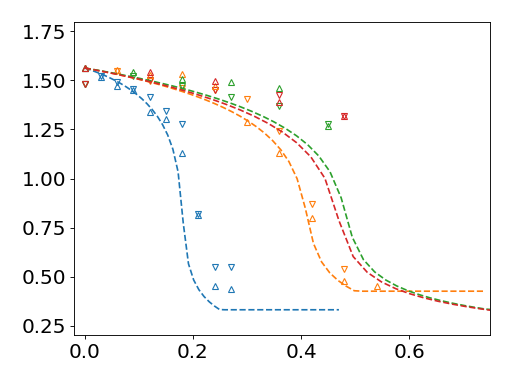

(-0.05, 0.7)

In [10]:
mark = ['v','^']
prop_cycle = plt.rcParams['axes.prop_cycle']
colors     = prop_cycle.by_key()['color']

plt.figure()
for i in range(2):
    for j in range(len(dD_ger)):
        phi = xHa_ger*dD_ger[j]
        plt.plot(phi, alpha_ger[i,j], mark[i], fillstyle='none', c=colors[j])
        if i==1:
            phi_vec = np.linspace(min(phi), max(phi)+0.2, 50)
            al = my_alpha(phi_vec,dD_ger[j],N_ger[i])
            plt.plot(phi_vec, al, '--', c=colors[j])
plt.tight_layout()
plt.ylim([0,1.8])
plt.xlim([-0.05, 0.7])

In [16]:
plt.ylim([0.2,1.8])
plt.xlim([-0.02, 0.75])

(-0.02, 0.75)

In [17]:
#plt.savefig('')

### Panel 2
Plot the phase diagram on a dD/phi graph.

It consist in the line xHa=xc, as well as the collapse datapoints.

The dD<<1 part should be blurred (no data) and high xHa (or phi or dD) triggers jamming

In [68]:
# Jeon, Shendruck and then gerardo's (read on the graph)
phic_JC   = np.array([0.36,0.46,np.nan])
dDc_JC    = np.array([0.3,0.4,0.5])
phic_shen = np.array([0.275,0.35,0.45])
dDc_shen  = np.array([0.2,0.25,1/3])
phic_ger  = np.array([0.24,0.48,np.nan,np.nan])
dDc_ger   = np.array([0.2,0.4,0.6,0.8])

# Jammed configurations (collapsed state could not be reached)
phiJ_JC = 0.5
dDJ_JC  = 0.5
phiJ_ger = [0.45,0.48]
dDJ_ger = [0.6,0.8]

<IPython.core.display.Javascript object>


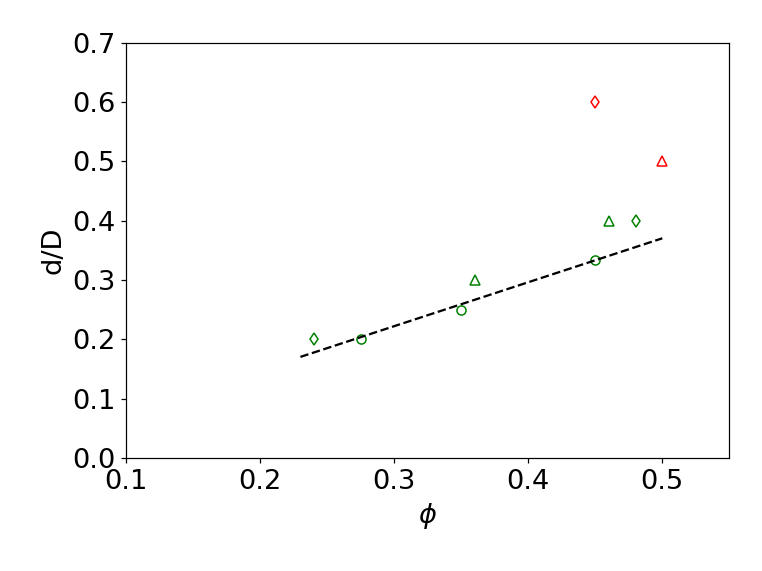

In [83]:
phi_ = np.array([0.23, 0.5])

plt.figure()
plt.xlabel('$\phi$')
plt.ylabel('d/D')
plt.plot(phic_JC,dDc_JC,'g^', fillstyle='none')
plt.plot(phiJ_JC, dDJ_JC,'r^',fillstyle='none')
plt.plot(phic_shen,dDc_shen,'go', fillstyle='none')
plt.plot(phic_ger,dDc_ger,'gd', fillstyle='none')
plt.plot(phiJ_ger, dDJ_ger,'rd',fillstyle='none')
plt.plot(phi_,phi_/1.35,'--k')
plt.xlim([0.1,0.55])
plt.ylim([0,0.7])
plt.tight_layout()

In [84]:
#plt.savefig('')